# Periodicity Analysis

To identify whether there is significant periodicity in the 1918 Spanish Flu dataset

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import fftpack
import matplotlib.pyplot as plt

import periodic_sampling as ps
from periodic_sampling.analysis import fourier_transform, plot_fft, weekday_t_tests
from periodic_sampling.analysis import wilcoxon_signed_rank_test, kruskal_weekday_test, multiple_comparisons_correction

In [10]:
# Read in data

df = pd.read_csv("spanish_flu.csv")
df.index = df.index.sort_values()
df["Date"] = pd.to_datetime(df["Date"].apply(lambda x : x + "-1918"), format = "%d-%b-%Y")
print(df.head())

        Date  Time  Cases
0 1918-09-23     0      4
1 1918-09-24     1      5
2 1918-09-25     2      5
3 1918-09-26     3      7
4 1918-09-27     4      9


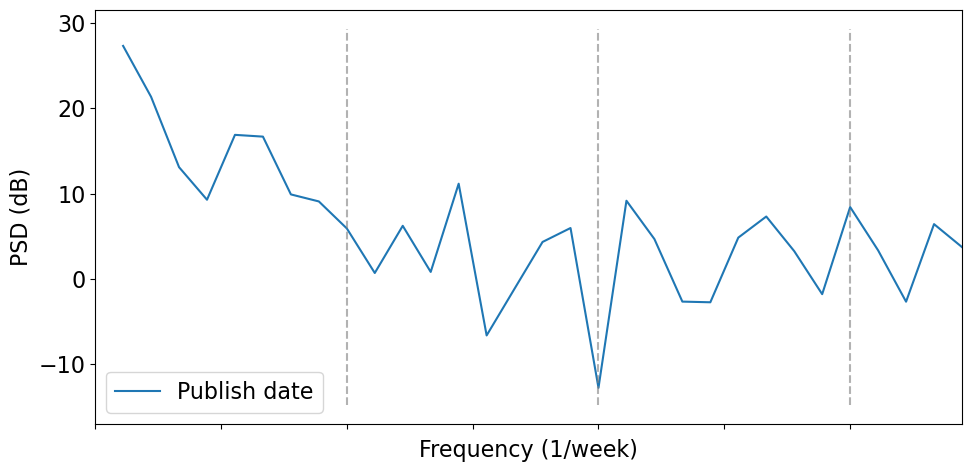

In [12]:
plt.rcParams['font.size'] = '16'
fig, ax = plt.subplots(1, 1, figsize=(10,5))

df["Days"] = df["Time"]
df = ps.analysis.rel_reporting_calc(df, ['Cases'])

case_fft_pub, case_freq_pub = fourier_transform(df, column='Dif_Cases', compute_psd=True)
plot_fft(case_fft_pub, case_freq_pub, ax=ax, color='tab:blue', label="Publish date", linewidth = 1.5)
ax.set_xticklabels([])


fig.patch.set_facecolor('white'); fig.tight_layout()
# plt.savefig(f"../images/uk_phe_data/daily_fft_cases_deaths.png")


## Weekly Patterns
We can identify periodic, weekly variation in the observed reporting factor.

In [13]:
summary = df.groupby('Weekday').median().sort_values('Day_Index')
print(summary[['Dif_Cases']])

           Dif_Cases
Weekday             
Monday      1.074886
Tuesday     0.976111
Wednesday   1.309278
Thursday    1.125681
Friday      1.288379
Saturday    1.142578
Sunday      0.636364


In [17]:
def _my_print(list, print_output = True):
    output = [float('%.2g' % x) for x in list]
    return output if not print_output else print(output)

def print_weekday_tests(df, col):
    print("Test results for column: " + col)
    print("  T-test stat: " + str(_my_print(weekday_t_tests(df, col, p_vals = False), print_output=False)))
    print("  p values:    " + str(_my_print(weekday_t_tests(df, col, p_vals = True), print_output=False)))
    print("  Accept H0:   " + str(multiple_comparisons_correction(weekday_t_tests(df, col), 0.01)))

print_weekday_tests(df, 'Dif_Cases')

Test results for column: Dif_Cases
  T-test stat: [0.79, 0.25, 1.6, 0.96, 1.2, 1.1, -0.21]
  p values:    [0.45, 0.81, 0.14, 0.37, 0.26, 0.31, 0.84]
  Accept H0:   [True, True, True, True, True, True, True]


In [18]:
print(kruskal_weekday_test(df, 'Dif_Cases'))

KruskalResult(statistic=2.379310344827587, pvalue=0.8817227028053246)
